In [1]:
from scipy import special as sp
from scipy.stats import gaussian_kde as kdf
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import sys


class KappaMu():
  '''
  KappaMu fading distribution Class
  '''
  def __init__(self, kappa, mu, r_hat, numSamples, numSim):
    # Parameters
    self.kappa = kappa
    self.mu = mu
    self.r_hat = r_hat  
    self.numSamples = numSamples
    self.numSim = numSim

    # For simulated densities
    self.generateSamples = self.generateSamples()
    self.X, self.Y = self.envelopeDensity(self.numSamples)

  def _pdf(self, r):
    '''
    Function to calculate kappa-mu pdf.
    Equation extracted from:
    https://www.fee.unicamp.br/sites/default/files/docentes/michel/the_kappa-mu_distribution_and_the_eta-mu_distribution.pdf
    Eq. (1) with rho = R = r / r_hat
    '''

    A = (2*self.mu * ((1 + self.kappa)**((self.mu+1)/2))) \
            /((self.kappa**((self.mu - 1)/2)) * np.exp(self.mu * self.kappa))
    R = r / self.r_hat
    B = (R**self.mu) * np.exp(- self.mu*(1 + self.kappa)*(R**2))
    C = sp.iv(self.mu - 1, 2*self.mu * R * np.sqrt(self.kappa*(1 + self.kappa)))
    PDF = A * B * C / self.r_hat 
    return PDF

  def scatteredComponent(self):
    '''
    Function to calculate scattered signal component's power
    '''
  
    sigma = self.r_hat / np.sqrt( 2 * self.mu * (1+self.kappa) )
  
    return sigma

  def generateGaussians(self, mean, sigma):
    '''
    Function to generate gaussian RVs
    '''

    gaussians = np.random.default_rng().normal(mean, sigma, self.numSim)
      
    return gaussians

  def generateSamples(self):
    '''
    Function to generate complex kappa-mu fading RVs
    '''
    
    p_i, q_i = self.calculateMeans()
    sigma = self.scatteredComponent()
    
    fading = 0
    for i in range(int(self.mu)):
        X_i = self.generateGaussians(p_i, sigma)
        Y_i = self.generateGaussians(q_i, sigma)
        fading = fading + X_i**(2) + Y_i**(2)  
    return fading

  def calculateMeans(self):
    '''
    Function to calculate IQ means
    '''
  
    d2 = (self.r_hat**(2) * self.kappa)/(1 + self.kappa);
  
    p_i = np.sqrt(d2/(2*self.mu))
    q_i = np.copy(p_i)
      
    return p_i, q_i

  def envelopeDensity(self, numSamples):
    '''
    Function for returning X and Y axes for each
    densities for each simulated sample
    '''
      
    R = np.sqrt(self.generateSamples)
    kde = kdf(R)
    x = np.linspace(R.min(), R.max(), numSamples)
    y = kde(x)
    
    return x, y

====== 80 kappa-mu samples succesfully generated! ======


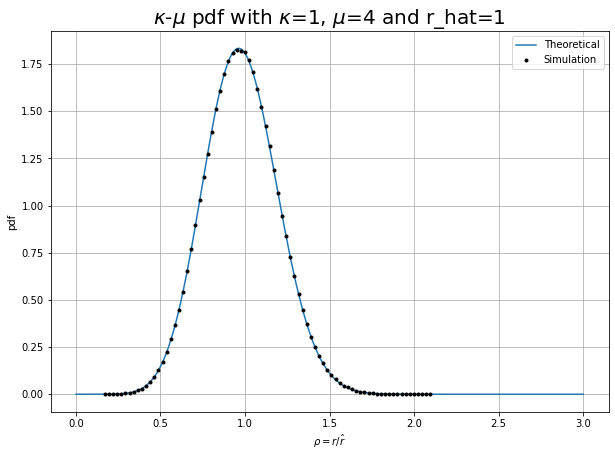

In [2]:
### PARAMETERS
N_GENERATIONS = 500
N_POPULATION = 1000
kappa = 1
mu = 4
r_hat = 1
numSamples = 80 # number of generated samples
numSim = 10**6 # number of gaussian points
theta = [kappa, mu, r_hat]

ku = KappaMu(kappa, mu, r_hat, numSamples, numSim) # instantiate KappaMu object
X = ku.X
Y = ku.Y
n = len(X)

# Plotting
print(f'====== {numSamples} kappa-mu samples succesfully generated! ======')
r = np.linspace(0, 3, 3000)# theoretical envelope PDF x axes
plt.figure(figsize=((10,7)))
plt.plot(r, ku._pdf(r), label='Theoretical')
plt.plot(ku.X, ku.Y, "k.", label='Simulation')
plt.title(r'$\kappa$-$\mu$ pdf with $\kappa$={}, $\mu$={} and r_hat={}'.format(kappa,mu,r_hat), fontsize=20)
plt.legend()
plt.grid(True)
plt.xlabel(r'$\rho=r/\hat{r}$')
plt.ylabel('pdf')
plt.show()

=== Generation: 0 === 
Fitness: 17.167076893293775
Best individual:
Kappa: 2.4927035972787586
Mu: 3.053833468523225
R_hat: 1.0878665298775727



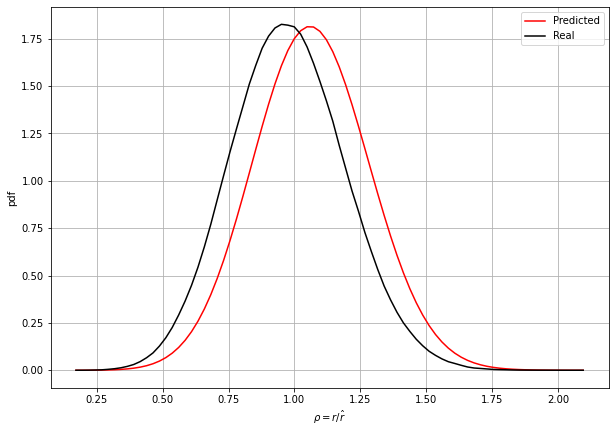

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


=== Generation: 1 === 
Fitness: nan
Best individual:
Kappa: 6.227899347386434
Mu: 9.08524286377063
R_hat: 0.054940824880177215



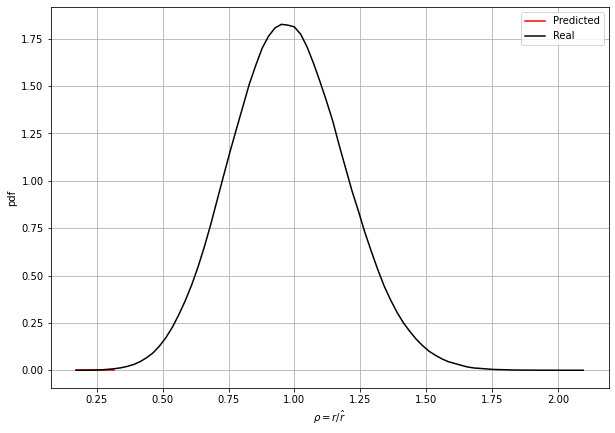

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


=== Generation: 2 === 
Fitness: 277.5987639243743
Best individual:
Kappa: 2.2748286655620387
Mu: 3.232142340959253
R_hat: 1.0015560694134569



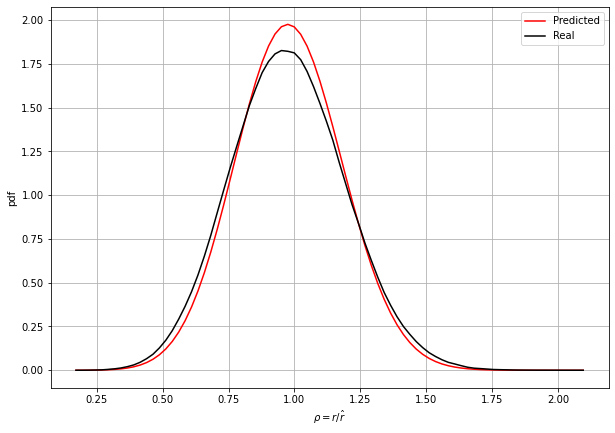

=== Generation: 3 === 
Fitness: 908.1346819672602
Best individual:
Kappa: 1.1199828307731121
Mu: 4.032808022526627
R_hat: 0.9895057459050667



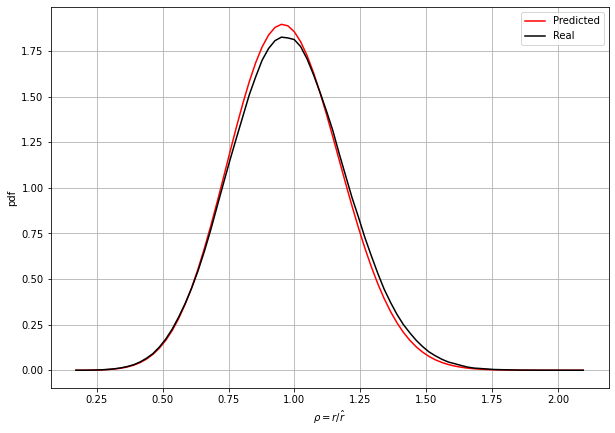

=== Generation: 4 === 
Fitness: 3748.6549734466553
Best individual:
Kappa: 1.8114058939332718
Mu: 3.0751893815816564
R_hat: 0.9925365055721008



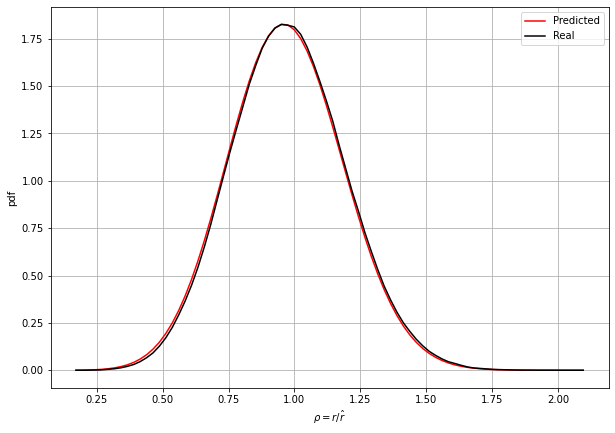

=== Generation: 5 === 
Fitness: 1653.4266342020453
Best individual:
Kappa: 1.0051658542976736
Mu: 4.1269602808593655
R_hat: 1.0080746251382255



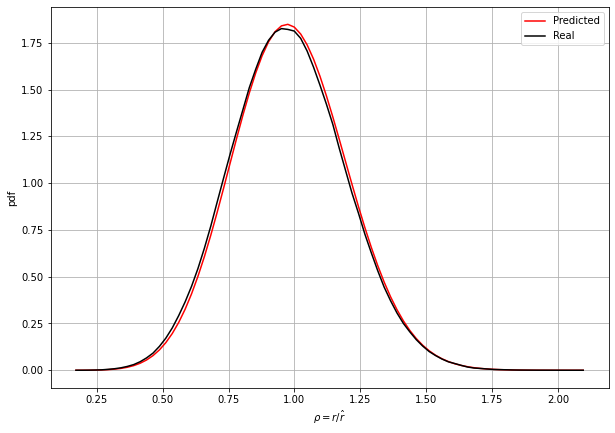

=== Generation: 6 === 
Fitness: 29105.88314770144
Best individual:
Kappa: 0.9858790437590771
Mu: 4.05678660565216
R_hat: 1.0015081883837242



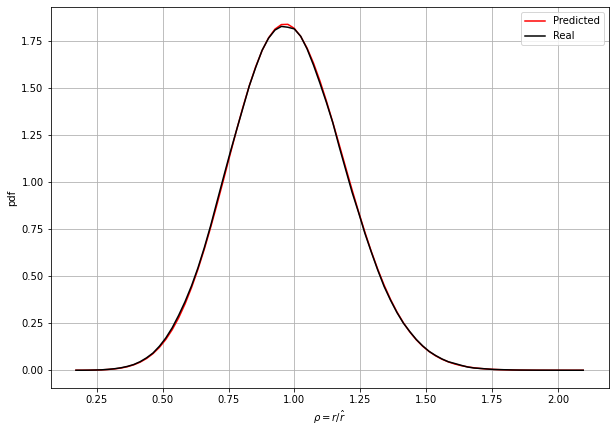

=== Generation: 7 === 
Fitness: 2516.794436677555
Best individual:
Kappa: 0.9923616157229925
Mu: 4.112062913913352
R_hat: 1.0067277836462245



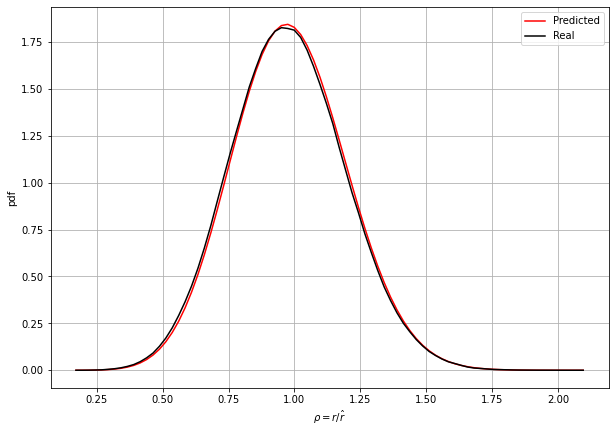

=== Generation: 8 === 
Fitness: 16863.35483377115
Best individual:
Kappa: 0.9990287569865313
Mu: 4.069949883035606
R_hat: 0.9992496224283163



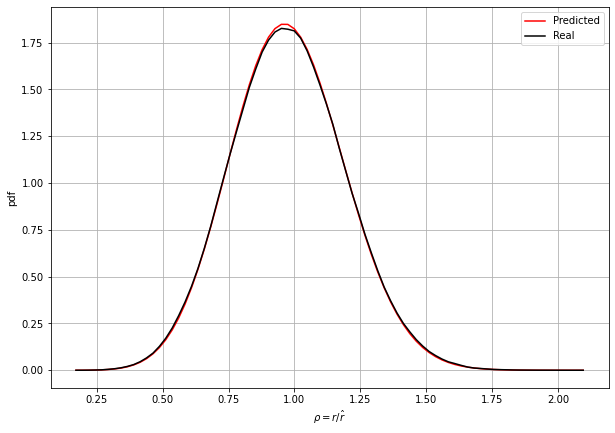

=== Generation: 9 === 
Fitness: 13880.29423255734
Best individual:
Kappa: 0.9659235228407038
Mu: 4.0886216243887
R_hat: 0.9978505338547898



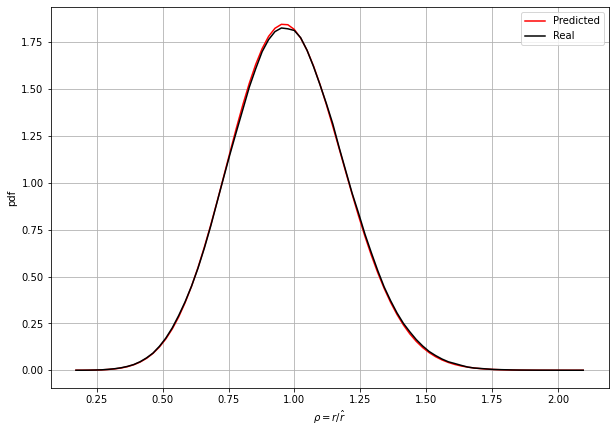

=== Generation: 10 === 
Fitness: 13616.185821991743
Best individual:
Kappa: 1.0116672101727002
Mu: 4.060737016545488
R_hat: 1.0014373381879385



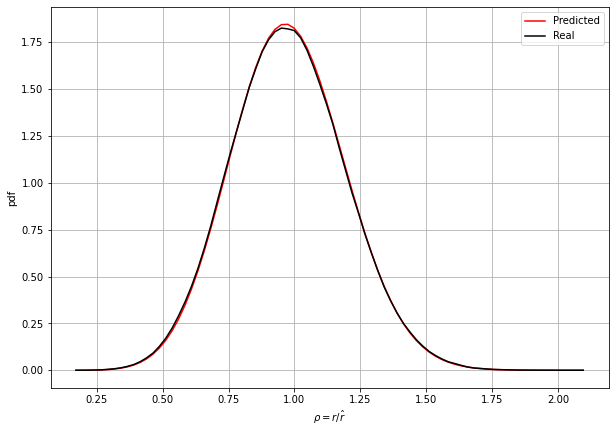

=== Generation: 11 === 
Fitness: 81710.39240216982
Best individual:
Kappa: 0.9865254793518868
Mu: 4.022668625142439
R_hat: 1.0008438339151637



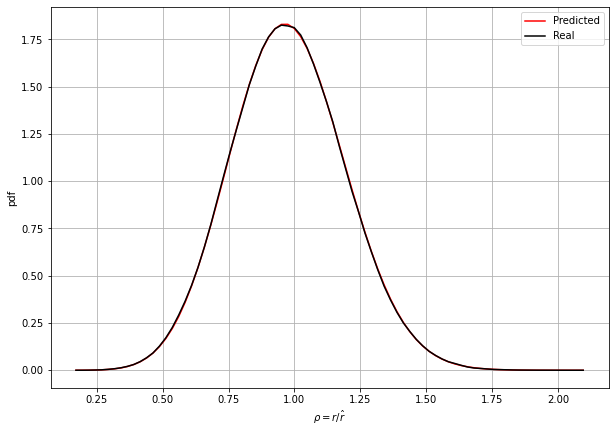

=== Generation: 12 === 
Fitness: 68560.6992863268
Best individual:
Kappa: 1.0286135371951013
Mu: 3.939637177471232
R_hat: 1.000649090895247



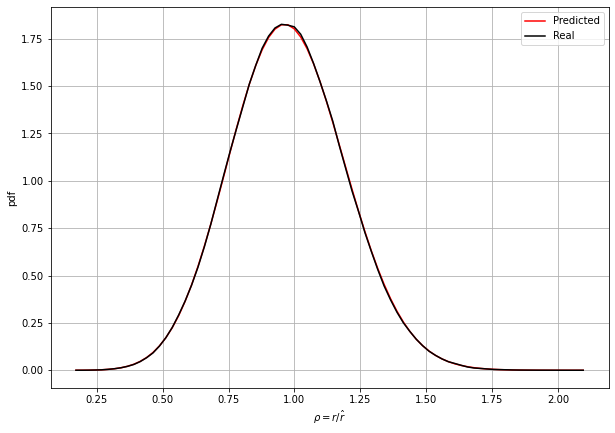

=== Generation: 13 === 
Fitness: 58310.296161362465
Best individual:
Kappa: 1.01358599649409
Mu: 3.956181804706734
R_hat: 0.9995048574521866



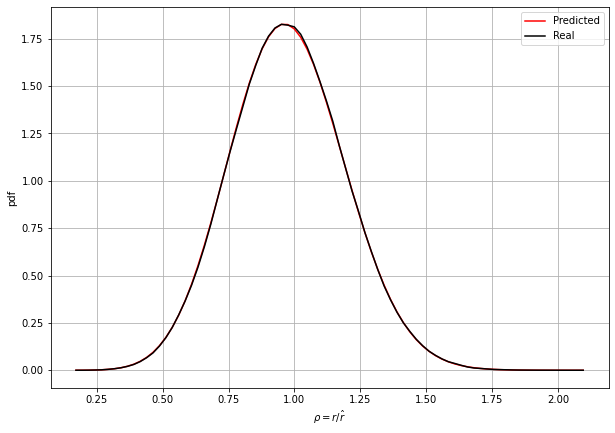

=== Generation: 14 === 
Fitness: 100011.49702516451
Best individual:
Kappa: 0.9934842205194905
Mu: 4.01429246404153
R_hat: 1.0002799120414116



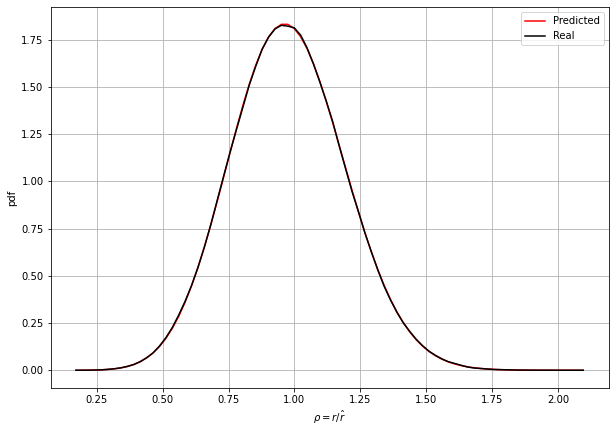

In [3]:
def computePDF(r, kappa, mu, r_hat):
  '''
  Function to calculate kappa-mu pdf.
  Equation extracted from:
  https://www.fee.unicamp.br/sites/default/files/docentes/michel/the_kappa-mu_distribution_and_the_eta-mu_distribution.pdf
  Eq. (1) with rho = R = r / r_hat
  '''

  A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
          /((kappa**((mu - 1)/2)) * np.exp(mu * kappa))
  R = r / r_hat
  B = (R**mu) * np.exp(- mu*(1 + kappa)*(R**2))
  C = sp.iv(mu - 1, 2*mu * R * np.sqrt(kappa*(1 + kappa)))
  PDF = A * B * C / r_hat 
  return PDF

def fitness(x,y,z):
  '''
  Fitness function (MSE) to determine how good a given solution is.
  '''
  y_pred = computePDF(X, x, y, z)
  cost = 1/n * sum(val**2 for val in (Y-y_pred))
  return 1/cost

# Generate solutions
solutions = []
for s in range(N_POPULATION):
  solutions.append((random.uniform(0.01, 10), # kappa
                     random.uniform(0.01, 10), # mu
                     random.uniform(1, 10))) # r_hat

for i in range(N_GENERATIONS):
  rankedSolutions = []
  for s in solutions:
    rankedSolutions.append( (fitness(s[0],s[1],s[2]), s) )
  rankedSolutions.sort()
  rankedSolutions.reverse()
  
  print(f'=== Generation: {i} === ')
  print(f'Fitness: {rankedSolutions[0][0]}')
  print('Best individual:')
  print(f'Kappa: {rankedSolutions[0][1][0]}')
  print(f'Mu: {rankedSolutions[0][1][1]}')
  print(f'R_hat: {rankedSolutions[0][1][2]}\n')

  plt.figure(figsize=((10,7)))
  plt.plot(ku.X, computePDF(ku.X, rankedSolutions[0][1][0], rankedSolutions[0][1][1], rankedSolutions[0][1][2]), "r", label='Predicted')
  plt.plot(ku.X, ku.Y, "k", label='Real')
  plt.legend()
  plt.grid(True)
  plt.xlabel(r'$\rho=r/\hat{r}$')
  plt.ylabel('pdf')
  plt.show()

  # Stop Criterion: Fitness > 10.000
  if rankedSolutions[0][0] > 100000:
    break
  
  # Combine the best solutions and make a new solution of those combined solutions
  bestSolutions = rankedSolutions[:100]
  elements = [] 
  for s in bestSolutions:
    elements.append(s[1][0])
    elements.append(s[1][1])
    elements.append(s[1][2])

  newGen = []
  for _ in range(N_POPULATION):
    e1 = random.choice(elements) * random.uniform(0.99,1.01) # Mutation of 2%
    e2 = random.choice(elements) * random.uniform(0.99,1.01) # Mutation of 2%
    e3 = random.choice(elements) * random.uniform(0.99,1.01) # Mutation of 2%

    newGen.append((e1,e2,e3))

  solutions = newGen